# Расчет проводимости трубопроводов с помощью МУК

In [1]:
import os
import numpy  as np
import pandas as pd
from graph import Graph #собственный класс для графиков
from matplotlib  import pyplot as plt
from rectangular import check_solution
from rectangular import clausing, flows
from rectangular import Rectangular, elementary

## Проверка элементарного УК

In [2]:
def angles(num = 5):
    #зависимость элементарного УК от угла
    c_i = np.array([1/2, 0, 1/2])
    c_j = np.array([1/2, 1, 1/2])
    n_i = np.array([0,1,0])
    angle_ar = np.linspace(0,1,num)*np.pi
    
    x, y = np.sin(angle_ar), np.cos(angle_ar)
    Y    = []
    for i in range(num):
        n_j = [x[i], y[i], 0]
        X   = angle_ar/np.pi
        Y.append(elementary(c_i,c_j,n_i,n_j,0.05))
    
    graph = Graph()
    graph.customize_graph("Зависимость  элем-го УК от угла", "Угол, rad/pi")
    plt.plot(X,Y)
    graph.save("angle.png", "tests")
    return

def distance(num = 5):
    #зависимость  элем-го УК от расстояния
    c_i  = np.array([1/2, 0, 1/2])
    #n_i и n_j "смотрят" друг на друга
    n_i  = np.array([0,-1,0])
    n_j  = np.array([np.sin(np.pi/4), np.cos(np.pi/4),0])
    dist = np.linspace(0.5,10,num)
    Y    = []
    for d in dist:
        c_j = np.array([1/2, d, 1/2])
        Y.append(elementary(c_i,c_j,n_i,n_j,0.05))
        
    graph = Graph()
    graph.customize_graph("Зависимость  элем-го УК от расстояния", "Расстояние")
    plt.plot(dist,Y)
    graph.save("distance.png", "tests")
    return

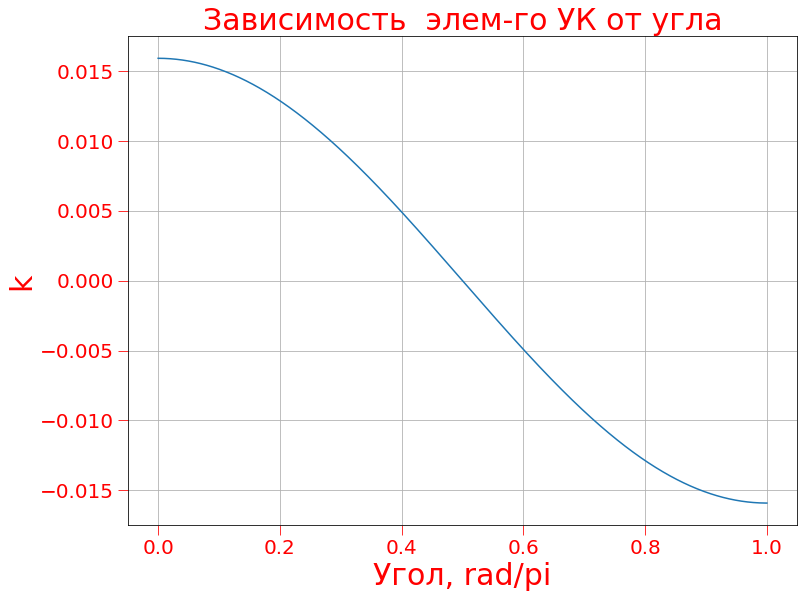

In [3]:
angles(1002)

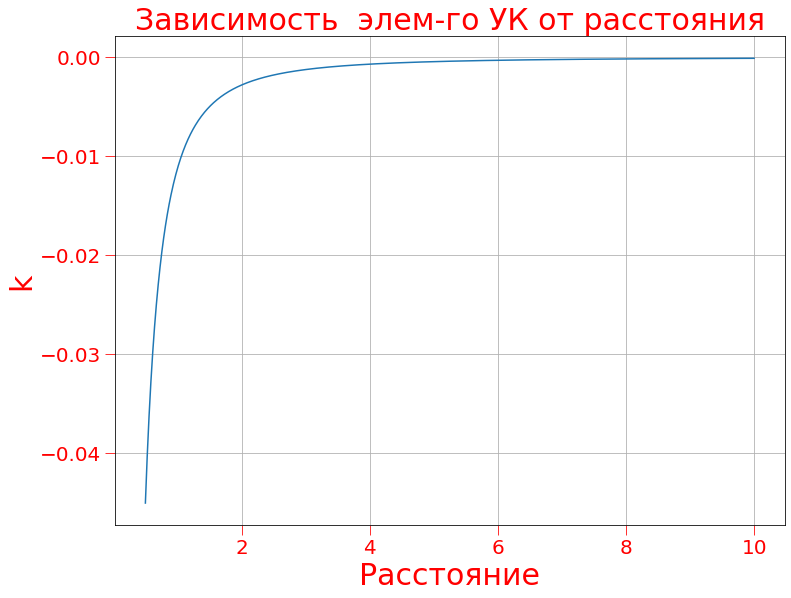

In [4]:
distance(1000)

## Проверка УК

In [5]:
def table(phi):
    #вывод всех пар УК.
    #phi_ij находится в i-й строке, j-м столбце.
    phi = np.transpose(phi)
    my_table = pd.DataFrame({"0" : phi[0]})
    for i in range(1,len(phi)):
        my_table[str(i)] = phi[i]
    return my_table

def mutuality(t, phi):
    #свойство взаимности.
    for i in range(1, len(phi)):
        for j in range(1, len(phi[i])):
            if round(phi[i][j] * t.areas[i-1],5) != round(phi[j][i] * t.areas[j-1],5):
                print("Свойство взаимности не выполнено для i =", i, "и j =", j)
    print("Проверка взаимности a =", t.a, "b =", t.b, "площади ячейки =", t.cell, "закончена")
    print("\n")   
    return

def additivity(t, phi):
    #свойство аддитивности.
    for i in range(1,len(phi)):
        for j in range(1,len(phi[i])):
            if i == j:
                break
            new_phi = t.check_add(i,j)
            if round(new_phi,5) != round(phi[i][j],5):
                print("Свойство аддитивности не выполнено для i=", i, "и для j=", j)
    print("Проверка аддитивности для a =", t.a, "b =", t.b, "площади ячейки =", t.cell, "закончена")
    print("\n")
    return 

In [6]:
def isolation(t, phi):
    #свойство замкнутости.
    print("\n")
    for i in range(1,len(phi)):
        sum = 0
        for j in range(1, len(phi[i])):
            sum += phi[i][j]
        print("Сумма для " + str(i) + "-го эмиттера равна", round(sum,5), "cells =", t.num_of_cells(i))
    return

In [7]:
tube_1, tube_2 = Rectangular(1,1,1), Rectangular(1,5,1)
#cell = 0.01
phi_1 = tube_1.matrix()

In [8]:
print("Для a = 1, b = 1, L = 1, step =", np.sqrt(tube_1.cell))
display(table(phi_1))

Для a = 1, b = 1, L = 1, step = 0.1


,0,1,2,3,4,5,6
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0


In [9]:
isolation(tube_1, phi_1)



Сумма для 1-го эмиттера равна 0 cells = 100
Сумма для 2-го эмиттера равна 0 cells = 100
Сумма для 3-го эмиттера равна 0 cells = 100
Сумма для 4-го эмиттера равна 0 cells = 100
Сумма для 5-го эмиттера равна 0 cells = 100
Сумма для 6-го эмиттера равна 0 cells = 100


In [10]:
print("Для a = 1, b = 5, L = 1, step =", np.sqrt(tube_1.cell))
phi_2 = tube_2.matrix()
display(table(phi_2))

Для a = 1, b = 5, L = 1, step = 0.1


,0,1,2,3,4,5,6
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0


In [11]:
isolation(tube_2, phi_2)



Сумма для 1-го эмиттера равна 0 cells = 500
Сумма для 2-го эмиттера равна 0 cells = 500
Сумма для 3-го эмиттера равна 0 cells = 100
Сумма для 4-го эмиттера равна 0 cells = 500
Сумма для 5-го эмиттера равна 0 cells = 100
Сумма для 6-го эмиттера равна 0 cells = 500


In [12]:
mutuality(tube_1, phi_1)
mutuality(tube_2, phi_2)

Проверка взаимности a = 1 b = 1 площади ячейки = 0.01 закончена


Проверка взаимности a = 1 b = 5 площади ячейки = 0.01 закончена




In [ ]:
additivity(tube_1, phi_1)
additivity(tube_2, phi_2)

Свойство аддитивности не выполнено для i= 2 и для j= 1
Свойство аддитивности не выполнено для i= 3 и для j= 1
Свойство аддитивности не выполнено для i= 3 и для j= 2
Свойство аддитивности не выполнено для i= 4 и для j= 1
Свойство аддитивности не выполнено для i= 4 и для j= 2
Свойство аддитивности не выполнено для i= 4 и для j= 3
Свойство аддитивности не выполнено для i= 5 и для j= 1
Свойство аддитивности не выполнено для i= 5 и для j= 2
Свойство аддитивности не выполнено для i= 5 и для j= 3
Свойство аддитивности не выполнено для i= 5 и для j= 4
Свойство аддитивности не выполнено для i= 6 и для j= 1
Свойство аддитивности не выполнено для i= 6 и для j= 2
Свойство аддитивности не выполнено для i= 6 и для j= 3
Свойство аддитивности не выполнено для i= 6 и для j= 4
Свойство аддитивности не выполнено для i= 6 и для j= 5
Проверка аддитивности для a = 1 b = 1 площади ячейки = 0.01 закончена


Свойство аддитивности не выполнено для i= 2 и для j= 1
Свойство аддитивности не выполнено для i= 3 и дл

## Проверка коэффициента Клаузинга

In [ ]:
def test_1(phi):
    #меньше ли 1.
    print("Коэффициент Клаузинга меньше единицы", clausing(phi) <= 1)
    print("\n")
    return

def test_0(phi):
    #больше ли 0.
    print("Коэффициент Клаузинга больше нуля", clausing(phi) >= 0)
    print("\n")
    return

In [ ]:
test_1(phi_1)
test_1(phi_2)

In [ ]:
test_0(phi_1)
test_0(phi_2)

## Вывод

### Потоки

In [ ]:
def print_flows(t, phi):
    print("Для a =", t.a, "b =", t.b, "L =", t.L, "step =", np.sqrt(t.cell))
    q = flows(phi)
    if check_solution(phi,q):
        print("Cистема решена верно \n")
    else:
        print("Ситема решена неверно")
        return
    print("")
    print("Поток, покидающий 1-ю  грань равен", round(q[0],5), "cells =", t.num_of_cells(1))
    print("Поток, покидающий 2-ю  грань равен", 0            , "cells =", t.num_of_cells(2))
    print("Поток, покидающий 3-ю  грань равен", round(q[1],5), "cells =", t.num_of_cells(3))
    print("Поток, покидающий 4-ю  грань равен", round(q[2],5), "cells =", t.num_of_cells(4))
    print("Поток, покидающий 5-ю  грань равен", round(q[1],5), "cells =", t.num_of_cells(5))
    print("Поток, покидающий 6-ю  грань равен", round(q[2],5), "cells =", t.num_of_cells(6))
    return

In [ ]:
print_flows(tube_1, phi_1)

In [ ]:
print_flows(tube_2, phi_2)

### Графики

In [ ]:
#ф-ция строит кривую на графике
def lines(x, k, name):
    plt.scatter(x, k, marker="o", label= name)
    #plt.plot(x, k)
    return

def depend_L(b, cell):
    x   = np.linspace(1,10,10)
    res = []
    for L in x:
        k = clausing(Rectangular(1,b,L,cell).matrix())
        res.append(k)
    return res

def depend_cells(b):
    x   = np.array([0.05, 0.1, 0.2, 0.25, 0.5])**2
    res = []
    for cell in x:
        k = clausing(Rectangular(1,b,1,cell).matrix())
        res.append(k)
    return res

def calc_y(b):
    y = []
    for i in [0.25,0.1]:
        y.append(depend_L(b,i**2))
    return y

In [ ]:
#ф-ция строит, называет,
#выводит и сохраняет график
def draw_L(y, b):
    x    = np.linspace(1,10,10)
    graph= Graph()
    graph.customize_graph("Проводимость в прямоугольном сечении при b = " + str(b),"L/a")
    plt.scatter(x,y[0],marker="o",label= "С шагом 0.25")
    plt.plot(x,y[0])
    plt.scatter(x,y[1],marker="o",label= "С шагом 0.1")
    plt.plot(x,y[1])
    plt.legend()
    
    graph.save("b" + str(b) + ".png","rectangular")
    plt.show()
    return

def draw_cells(y,b):
    x    = np.array([0.05, 0.1, 0.2, 0.25, 0.5])**2
    graph= Graph()
    graph.customize_graph("Проводимость в прямоугольном сечении при b = " + str(b),"Площадь ячейки")
    plt.plot(x,y,marker="o")
    graph.save("b" + str(b) + "cells.png","rectangular")
    plt.show()
    return

In [ ]:
y_1 = calc_y(1)

In [ ]:
draw_L(y_1,1)

In [ ]:
y_5 = calc_y(5)

In [ ]:
draw_L(y_5,5)

In [ ]:
cell_1 = depend_cells(1)

In [ ]:
draw_cells(cell_1,1)

In [ ]:
cell_5 = depend_cells(5)

In [ ]:
draw_cells(cell_5,5)